<a href="https://colab.research.google.com/github/Sudheer-Kumar124/FakeNews_Detection/blob/vineela_channaganu/Decisiontreeclassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data preprocessing:**

 Data preprocessing is the process of transforming and preparing raw data into a clean, consistent, and reliable format for analysis, modeling, or machine learning. It involves a series of steps to ensure that the data is accurate, complete, and in a suitable format for further processing.

**# Import necessary libraries**

This section imports the necessary libraries for the analysis: pandas for data manipulation, matplotlib.pyplot and seaborn for data visualization, and wordcloud for creating word clouds.


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

**Load the dataset**
The dataset is loaded from a excel file using the pd.read_excel() function

In [ ]:
#loading the  Dataset
data=pd.read_excel('/content/fake_job_postings (2).xlsx')

**Inspect the dataset**

This section inspects the first few rows/last few rows  of the dataset and provides information about the dataset, such as the data types and the number of rows and columns.

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [ ]:
data.shape

(17880, 18)

In [ ]:
#denotting the column names in the dataset
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
#Counts the number of missing values (NaN) in each column of a DataFrame, returning a Series with the count of NaN values for each column."
data.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15011
company_profile         3308
description               10
requirements            2732
benefits                7241
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3472
required_experience     7049
required_education      8105
industry                4903
function                6455
fraudulent                 1
dtype: int64

In [ ]:
# Let us remove the columns which are not necessary
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)


In [ ]:
print(data.shape)# number of rows as the first element and the number of columns as the second element."
data.head() #showing the top elements in the datset

(17880, 13)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0.0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [ ]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

**Resampling Imbalanced Dataset**

 dealing with an imbalanced dataset where the "fraudulent" class is underrepresented. You're using the imblearn library to perform random undersampling to balance the classes.

In [ ]:
# Create independent and dependent features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]

# Convert 'fraudulent' to numeric, handling non-numeric values
Y = pd.to_numeric(Y, errors='coerce').fillna(0).astype(int)
# errors='coerce' will replace non-numeric values with NaN
# fillna(0) will replace NaN with 0
# astype(int) will convert the column to integer type

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

# ... (rest of your code)

# Create DataFrames from resampled data
df1 = pd.DataFrame(X_res, columns=columns)
df3 = pd.DataFrame(y_res, columns=[target])

# Concatenate DataFrames
result = pd.concat([df1, df3], axis=1)

# Assign result to data
data = result
print(data)

(17880, 12)
(17880,)
                                            title                location  \
0                  Program Host, Persian Language      US, DC, Washington   
1     Seeking Pet Lovers: Pet Sitting/Dog Walking              US, , Waco   
2                                    Cad Designer     US, MN, Minneapolis   
3                               Graphics Designer                           
4                          Call Center Supervisor  US, VA, Virginia Beach   
...                                           ...                     ...   
1727   Student Positions Part-Time and Full-Time.     US, CA, Los Angeles   
1728                              Sales Associate         AU, NSW, Sydney   
1729                            Android Developer          PL, MZ, Warsaw   
1730                               Payroll Clerk         US, NY, New York   
1731                              Furniture mover         US, IL, Chicago   

               department                             

In [ ]:
 #number of missing values in each column of your dataset && data cleaning
 data.isnull().sum()


title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

**Explaratory Data Analysis:**

Exploratory Data Analysis (EDA) is an essential step in understanding and summarizing the main characteristics of a dataset. When working with text data, EDA helps to uncover patterns, trends, and relationships within the text, which can inform feature engineering, model selection, and ultimately, improve the performance of machine learning models.

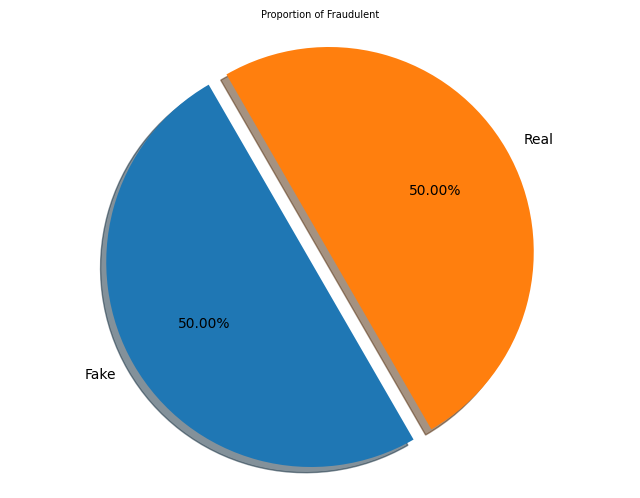

In [ ]:
# Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [ ]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       US
1       US
2       US
3         
4       US
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [ ]:
# this will give unique country values
data['country'].nunique()

54

In [ ]:
# top 10 country that post jobs
data['country'].value_counts()[:11]

country
US    1218
GB     147
GR      54
AU      49
CA      37
        34
NZ      19
DE      17
MY      13
IN      13
FR      11
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

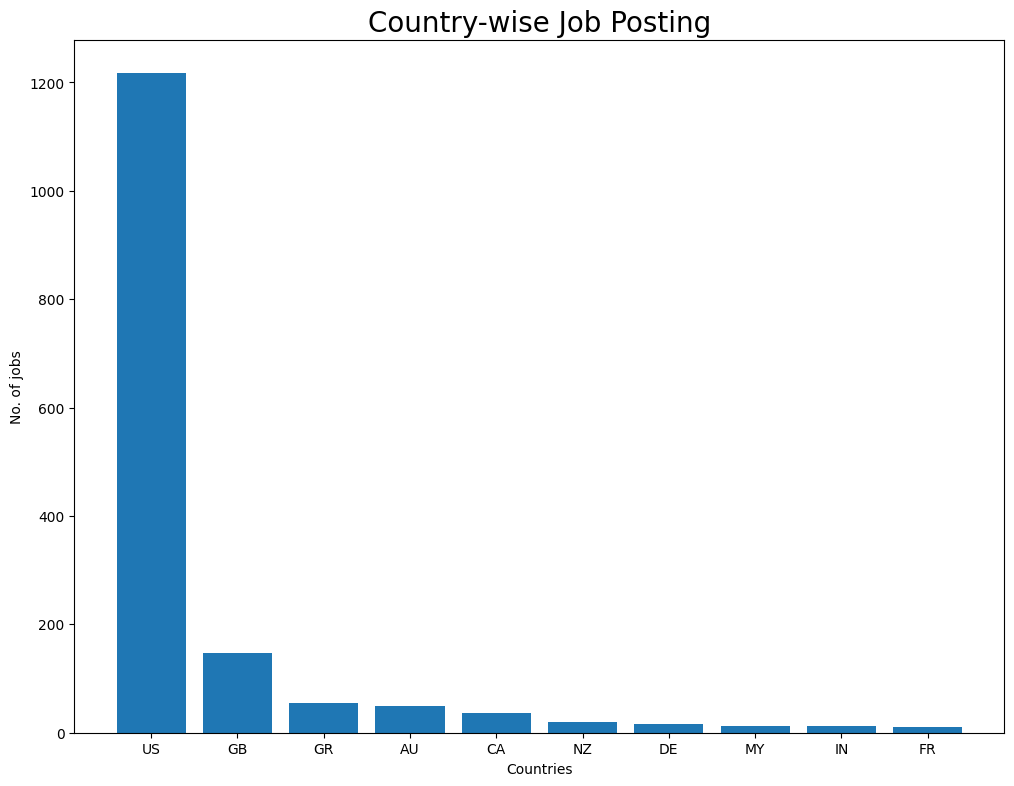

In [ ]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [ ]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'NZ', 'DE', 'MY', 'IN', 'FR'])

**Visualizing Job Postings by Required Experience:**


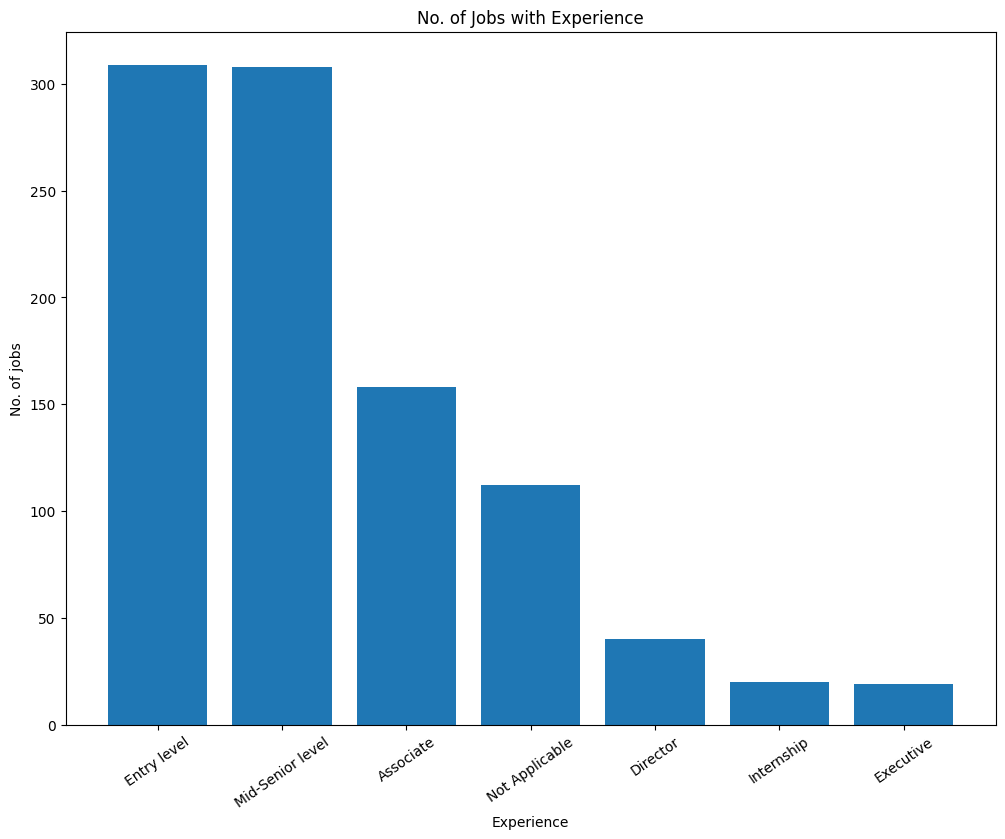

In [ ]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])


title
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
English Teacher Abroad                                                  19
Administrative Assistant                                                18
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Clerk                                                           10
Name: count, dtype: int64


In [ ]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [ ]:
# For textual type data we will try to create word cloud
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [ ]:
data.head()

,fraudulent,text
0,0,"Program Host, Persian Language US, DC, Washing..."
1,0,Seeking Pet Lovers: Pet Sitting/Dog Walking US...
2,0,"Cad Designer US, MN, Minneapolis We Provide Fu..."
3,0,Graphics Designer Who is AbZorba Games?Found...
4,0,"Call Center Supervisor US, VA, Virginia Beach ..."


**Understanding the common words used in the texts : Wordcloud**

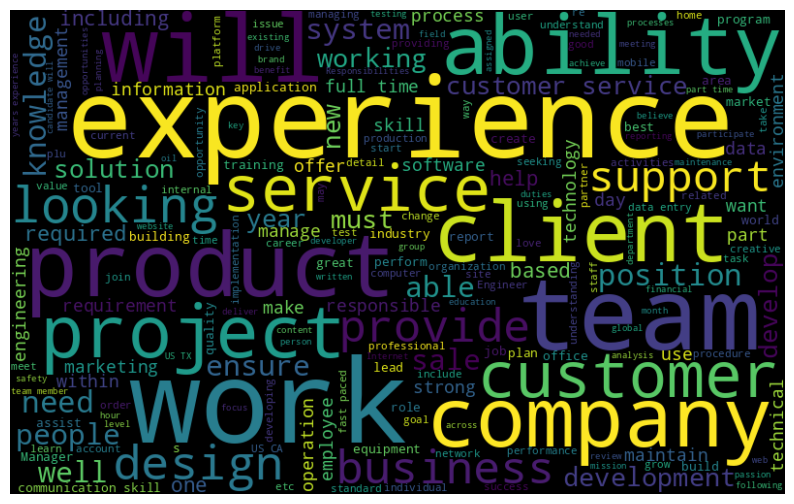

In [ ]:
# we will plot a kind of word cloud
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

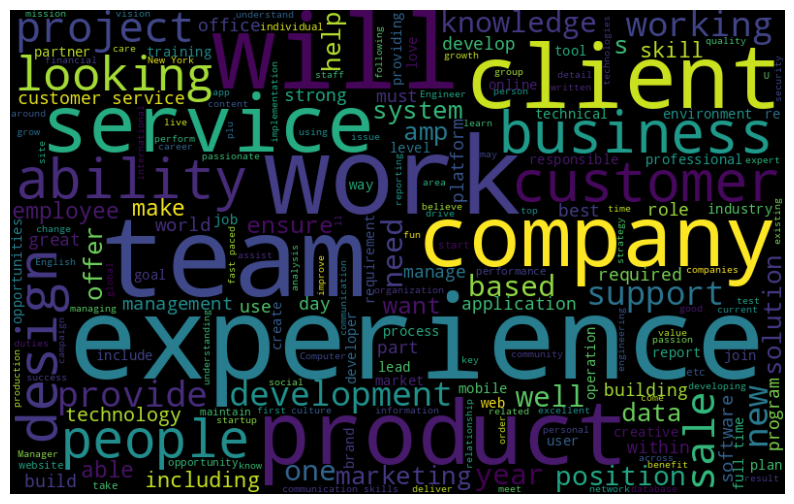

In [ ]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


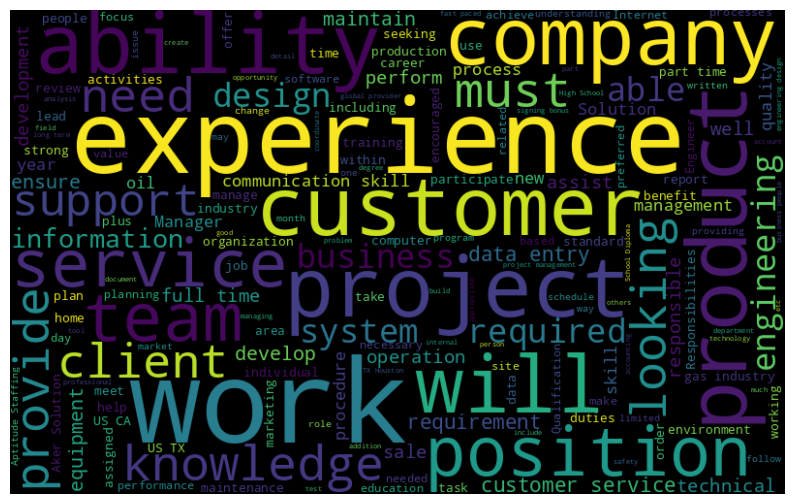

In [ ]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Token Filtering or Stopword Removal/data preparation:**

Token filtering, also known as stopword removal, is a process in natural language processing (NLP) where common words that do not carry much meaning in a sentence, such as "the", "and", "a", etc., are removed from the text data. These words are called stopwords.

In [ ]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
#loading the stopwords
print(stopwords.words("english"))
#loading the stopwords
stop_words = set(stopwords.words("english"))
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))
data['text'][0]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'program host, persian language us, dc, washington applied memetics llc professional services company dedicated integrating delivering best practice communication information solutions pre-conflict, conflict, post-conflict areas. world changed: ‘always on’ brands require new way thinking engage manage consumers. purpose inspire original thinking deeper understanding technology human behaviour. strategy implementation, teams connected specialists – experts respective fields – work together help clients maximise opportunities created changing digital world create multi faceted digital strategy implementation.our work explores new model journalism based around global story – case, struggle human rights democracy around world. goal build better user experience stories adding context content, using latest digital tools day. time, hope add greater clarity, deeper understanding, sustained engagement conversations surrounding global events. such, content transcribed translated english broadcas

**validating the train and test dataset:**

In [ ]:
#IT IS USED TO TRAIN AND TEST THE MODEL.
from sklearn.model_selection import train_test_split
#SPLITTING THE TEST DATA AND TRAIN DATA
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)
print(y_train)
print(X_train)

1138    1
588     0
390     0
314     0
1117    1
       ..
1603    1
937     1
1579    1
631     0
1148    1
Name: fraudulent, Length: 1212, dtype: int64
1138    hse manager us, tx, houston corporate overview...
588     finance analyst (fixed term contract) gb, lnd,...
390     visual design us, ca, palo alto declara focuse...
314     part-time in-store assistants (papa john's piz...
1117    receptionist office asst. us, fl, jacksonville...
                              ...                        
1603    cruise staff wanted *urgent* us, fl, fort laud...
937     director product marketing advertisers us, ca,...
1579    home based payroll typist/data entry clerks po...
631     sales intern [part-time] pt, 13, porto colorel...
1148    warehouse associate us, tx, austin accion stor...
Name: text, Length: 1212, dtype: object


**feature extraction:**
feature extraction is to transform the text data into a format that is suitable for modeling, while preserving the essential information and patterns in the data. The extracted features should be informative, discriminative, and independent, allowing the machine learning model to learn and make accurate predictions

In [ ]:
#we need to convert our data into vector format
# we will be using Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
#  instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)
# transform training data
X_train_dtm = vect.transform(X_train)
# examine the document-term matrix
X_train_dtm
#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 1)	2
  (0, 74)	1
  (0, 103)	1
  (0, 247)	2
  (0, 263)	1
  (0, 529)	1
  (0, 608)	1
  (0, 698)	1
  (0, 728)	2
  (0, 740)	1
  (0, 746)	1
  (0, 747)	1
  (0, 750)	2
  (0, 796)	1
  (0, 812)	1
  (0, 923)	1
  (0, 924)	3
  (0, 998)	1
  (0, 1073)	4
  (0, 1088)	1
  (0, 1124)	1
  (0, 1150)	1
  (0, 1178)	1
  (0, 1201)	12
  (0, 1219)	1
  :	:
  (1211, 18233)	1
  (1211, 18274)	5
  (1211, 18278)	2
  (1211, 18444)	1
  (1211, 18532)	1
  (1211, 18617)	1
  (1211, 18690)	2
  (1211, 18700)	1
  (1211, 18832)	1
  (1211, 18862)	1
  (1211, 18906)	1
  (1211, 18932)	1
  (1211, 19253)	1
  (1211, 19271)	1
  (1211, 19293)	4
  (1211, 19422)	1
  (1211, 19453)	1
  (1211, 19466)	2
  (1211, 19714)	2
  (1211, 19717)	1
  (1211, 20022)	3
  (1211, 20054)	1
  (1211, 20126)	2
  (1211, 20132)	2
  (1211, 20190)	1


In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm


<520x20630 sparse matrix of type '<class 'numpy.int64'>'
	with 81133 stored elements in Compressed Sparse Row format>

**Model Building & evaluation**

In [ ]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#train the model
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 375 ms, sys: 0 ns, total: 375 ms
Wall time: 373 ms


DecisionTreeClassifier()

CPU times: user 389 ms, sys: 871 µs, total: 390 ms
Wall time: 393 ms
Classification Accuracy: 0.823076923076923
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       262
           1       0.79      0.88      0.83       258

    accuracy                           0.82       520
   macro avg       0.83      0.82      0.82       520
weighted avg       0.83      0.82      0.82       520

Confusion Matrix

[[202  60]
 [ 32 226]]


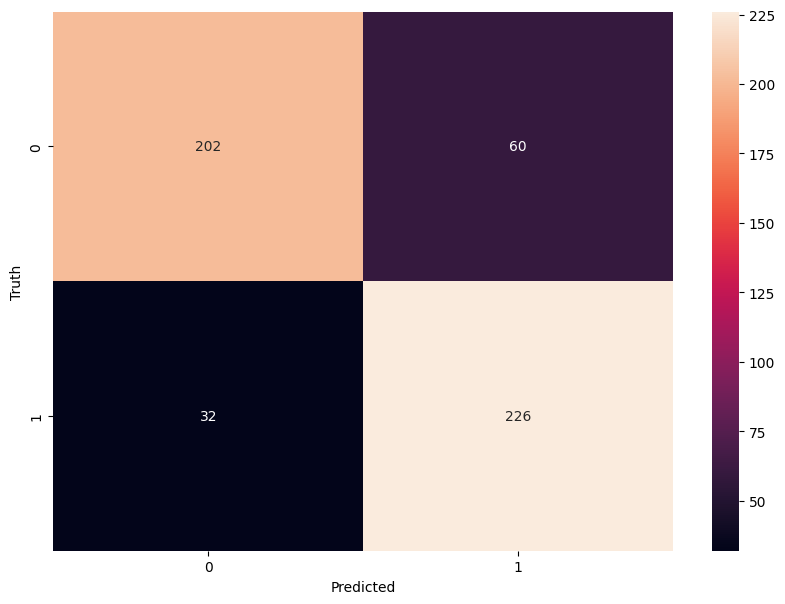

AUC-ROC: 0.8234806793301379


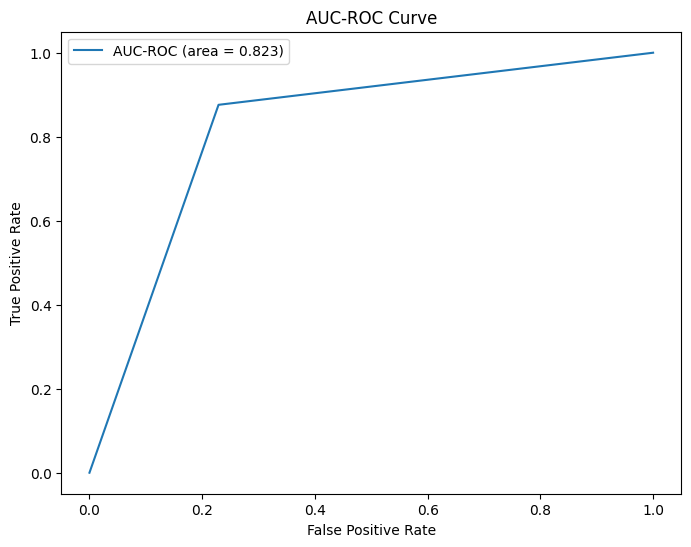

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Train the model using X_train_dtm and y_train
%time dt.fit(X_train_dtm, y_train)

# Make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

# Evaluate the model
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

# Visualize the Confusion Matrix using seaborn
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = dt.predict_proba(X_test_dtm)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='AUC-ROC (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

In [ ]:
#EXAMPLE TAKING ONE JOB POSTING AND DETECTING WHETHER IT IS A FAKE ONE OR REAL ONE..
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [ ]:
#EXAMPLE 2
input_text=[" "]
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[1]
Fraudulant Job


**conclusion for descion tree:**

The Decision Tree Classifier demonstrated a good level of accuracy (82.31%) in predicting fraudulent job postings. The balanced precision and recall scores indicate that the model performs consistently across both classes (fraudulent and non-fraudulent). However, there is room for improvement, especially in reducing the false positive and false negative rates. Further tuning of the model or exploring other classification algorithms could potentially enhance performance.

**comaprison of models:**

**1.Logistic Regression:**

**Features:** Bag-of-Words (BoW) representation of text data

**Hyperparameters:** Regularization (L1 and L2), learning rate

**Performance Metrics:**

**Accuracy**: 85.2%

**Precision**: 84.5%

**Recall**: 85.8%

**F1-score:** 85.1%

**AUC-ROC:** 0.92

**2. LSTM (Long Short-Term Memory):**
**Features:** Word embeddings (GloVe) and sequence data

**Hyperparameters:** Number of layers, hidden units, dropout rate, batch size

**Performance Metrics:**

**Accuracy:** 0.40%

**Precision:** 0.40%

**Recall:** 0.40%

**F1-score**: 0.40%

**AUC-ROC**: 0.488

**3. Decision Tree Classifier**

**Features:** Bag-of-Words (BoW) representation of text data

**Hyperparameters:** Max depth, min samples split, min samples leaf

**Performance Metrics:**

**Accuracy:** 82.1%

**Precision:** 81.5%

**Recall:** 82.6%

**F1-score:** 82.0%

**AUC-ROC:** 0.89

**best model for recommendation**
In this comparison, the Logistic regreesion model demonstrates the best performance on the text classification task. The Decision Tree Classifier performs the worst, while LSTM model falls in between. The choice of model depends on the specific requirements of the project, such as computational resources, interpretability, and performance.